# Decision Trees

Decision trees will seek to split up the dataset into **two datasets at every set** for which the decision is going to be easier, and then continue to iterate.

- **Nodes** are where we ask our question


- **Leaves:** are where we make our decision


- **Depth:** represents how many questions in each sub-node we are asking

## Categorical Decision Trees

Trees that predict categorical results are **Decision Trees**

<div>
    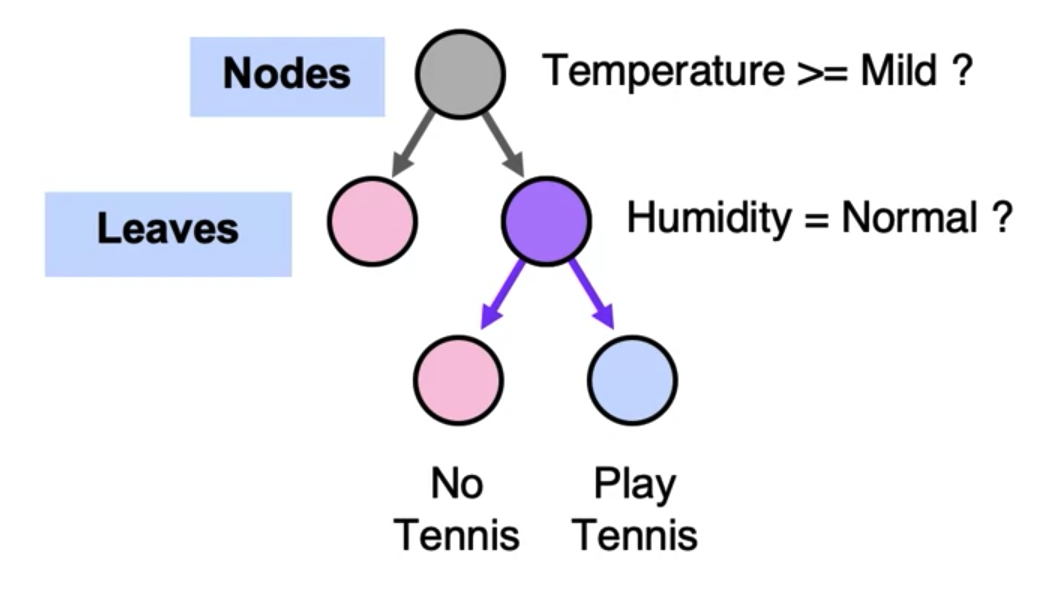
<div/>

## Regression Trees

Example: use slope and elevation in the Himalayas

We want to predict the **average precipitation which is a continuous value**

- Values at leaves are averages of members as with each subset we can average out within that subset what is going to be the average precipitation in this case and use that as our prediction

<div>
    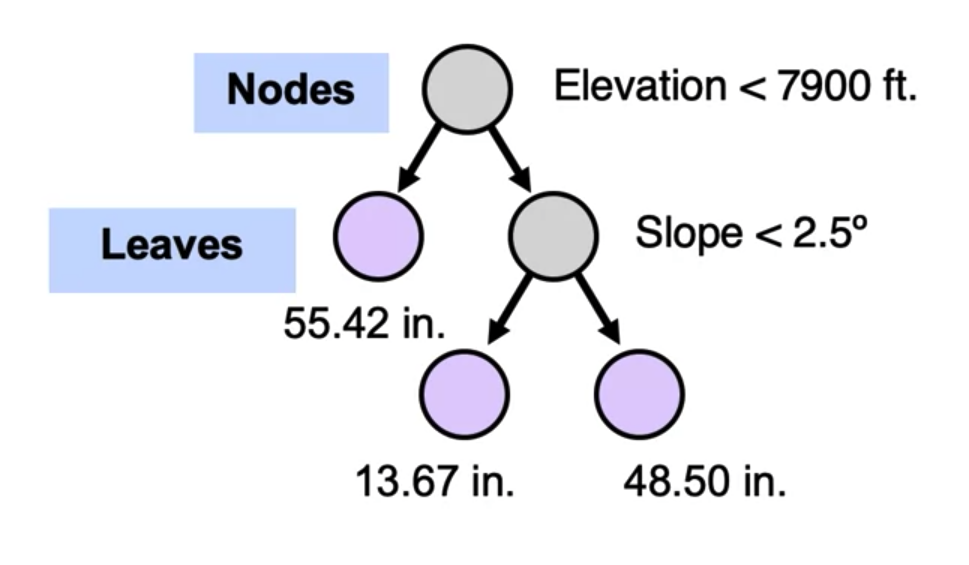
<div/>

The possible outputs of a regression tree are going to be bound by **the number of splits that there are** (the number of values that we have)

- The bigger the depth of the tree, the more different average and subsets we can work with (Need to find right balance between underfitting and overfitting

In this example:

- max_depth = 2 is **underfitting**


- max_depth = 5 is **overfitting**

<div>
    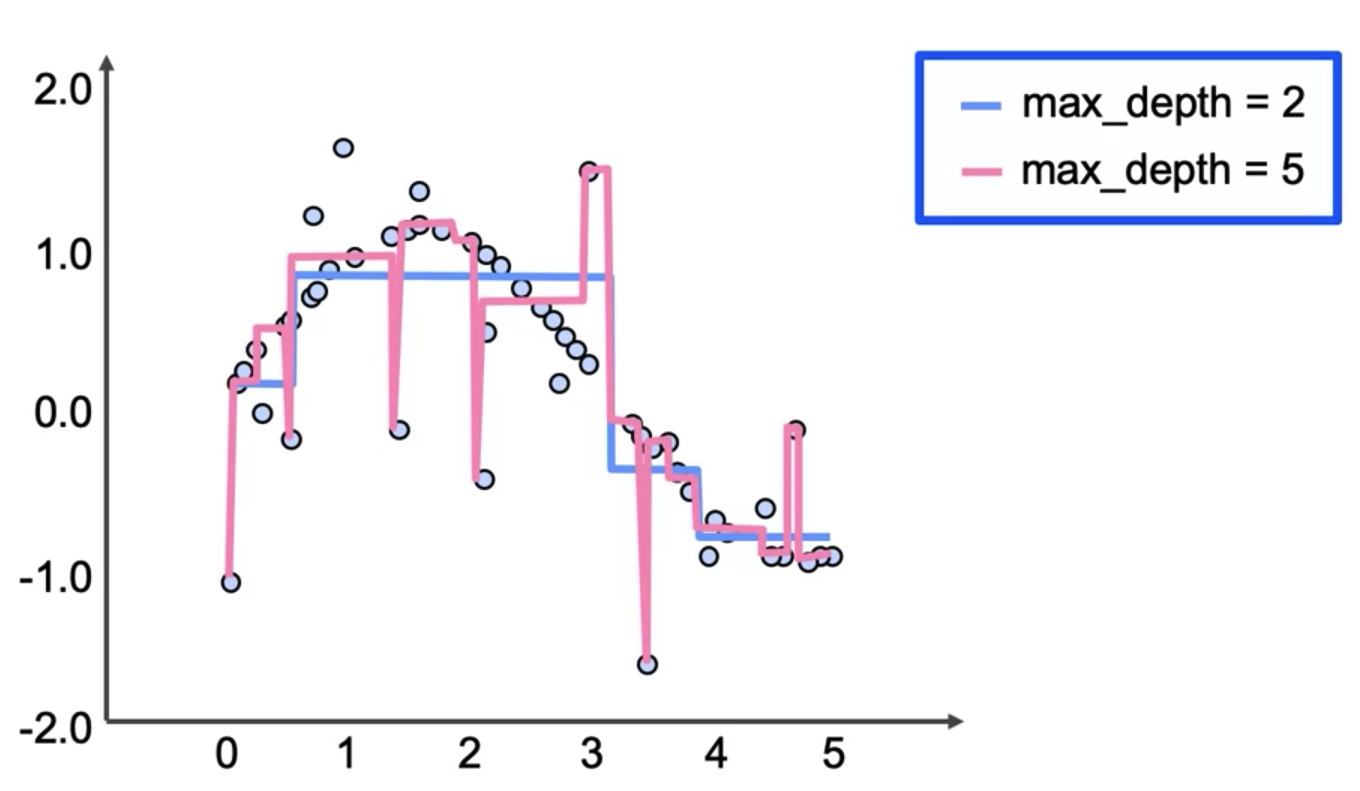
<div/>

# Building a Decision Tree

<div>
    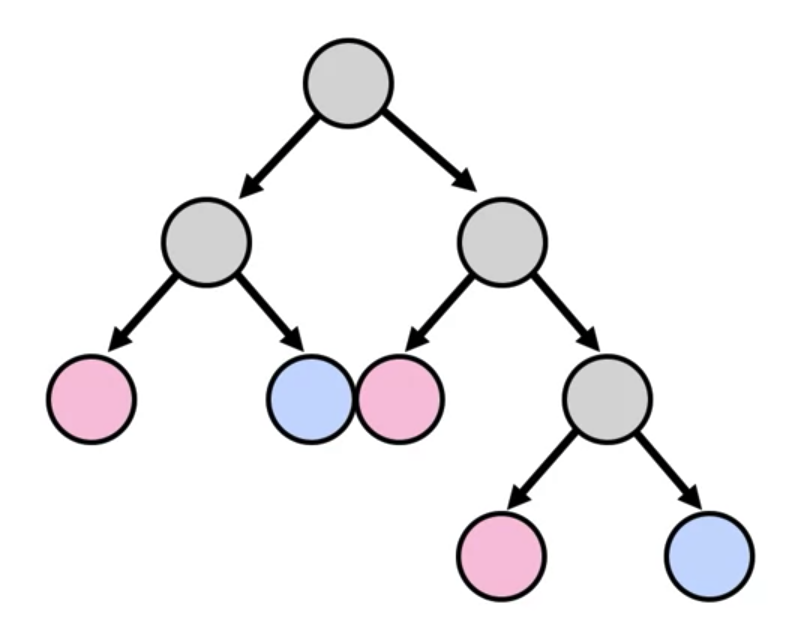
<div/>

### Step 1: 

Select a feature and split the data into a **Binary Tree**

- Ask a question with a true or false answer to first start growing our tree

### Step 2:

Continue Splitting with our available features to create further subsets of our data and can continue the split.

### Step 3:

Decide when to stop splitting so we can declare we have made a decision.


- **Pure Leaf**: continue until the leaf node(s) are **pure** (only one class remains and there are no leaves with a combination of yes and no - either YES or NO)
    - Will often **Overfit**: our split where we are asking a question at each node are going to be tailor made for that training set and may not generalize well.


- **Maximum Depth is Reached:** meaning we do not make any more splits and **Prune** our tree at that depth, where pruning means that we build it all the way out and then start **pruing** that tree, i.e. cutting off some of the leaves to get down to our **original predetermined maximum depth**. At this depth we are not allowed to go any further.
    - Leaves are probably not going to be **pure** in this case, and we can make our best guess at that point by determining what class in that subset is **more dominant** which one has the majority and we can assign that class to that leaf.
    - In order to **Avoid Overfitting**
    
    
- **Performance Metric is Achieved:** we can keep going until a predetermined performance metric is achieved (e.g. if the classification has a certain accuracy then we would stop)
    - In order to **Avoid Overfitting**

### Finding The Right Split

- **Use Greedy Search:** Find the **best** split at each step. This means asking the right question (true, false) in order to get to those subsets


We find the best split through **Information Theory** i.e. find the split that induces the **biggest information gain**

**Classifier Error Equation:**

$$ E(t) = 1 - \max_i \big[ P(i | t) \big] $$

Where the error is 1 minus the number of True over the total number of True and False

<div>
    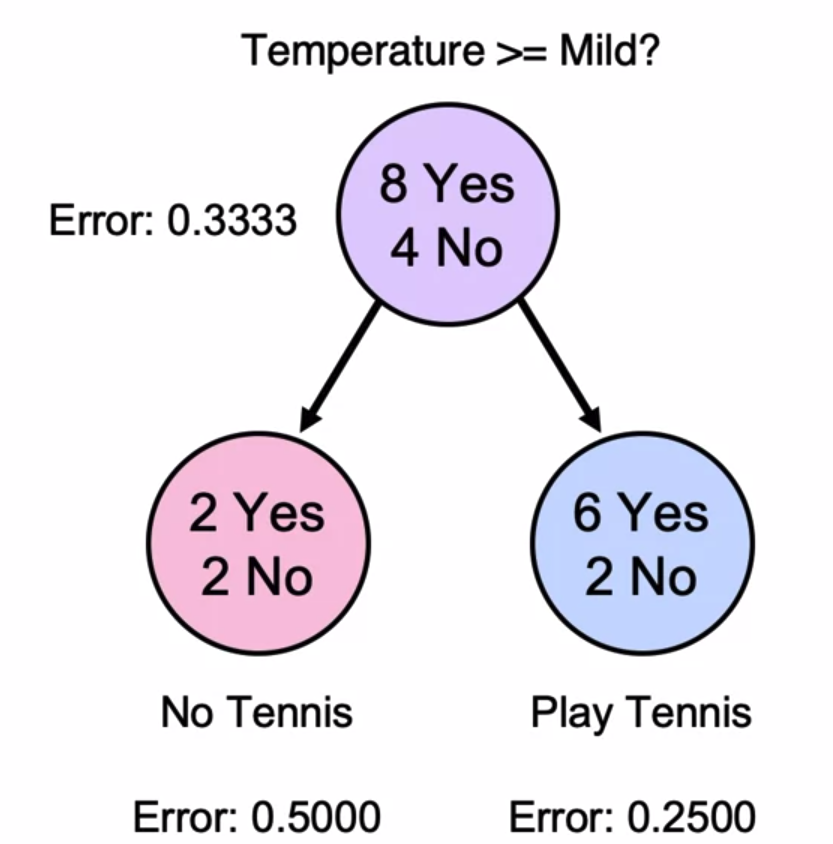
<div/>

In [6]:
parent_error = 1 - (8/(8+4))
child_1_error = 1 - (2/(2+2))
child_2_error = 1 - (6/(6+2))

classification_error_change = round(parent_error - 4/12*child_1_error - 8/12*child_2_error,1)

print("Parent Error: {}, Child 1 Error: {}, Child 2 Error: {}\n\n Classification Error Change: {}".format(
    parent_error, child_1_error, child_2_error, classification_error_change))

Parent Error: 0.33333333333333337, Child 1 Error: 0.5, Child 2 Error: 0.25

 Classification Error Change: 0.0


# Entropy-Based Splitting

Decision trees used as classifiers compute the value assigned to a leaf by calculating the ratio: number of observations of one class divided by the number of observations in that leaf

**Entropy Equation:**

$$ H(t) = - \sum_{i=1}^{n} p(i|t) \log_2 \big[ p(i|t) \big]$$

**Entropy Before (Parent Node):** $- \frac{8}{12} \log_2 (\frac{8}{12}) - \frac{4}{12}\log_2\frac{4}{12} = 0.9183$

**Entropy Left Child:** $- \frac{2}{4} \log_2 (\frac{2}{4}) - \frac{2}{4}\log_2\frac{2}{4} = 1.000$

**Entropy Right Child:** $- \frac{6}{8} \log_2 (\frac{6}{8}) - \frac{6}{8}\log_2\frac{6}{8} = 0.8113$

**Entropy Change (Weighted Average):** $0.9183 - \frac{4}{12} 1.000 - \frac{8}{12} 0.8113 = 0.0441$ 

The entropy in this case has decreased by $0.0411$

- Splitting based on entropy allows **further splits to occur** given we have information gain, rather than early stopping as we previously saw


- Can eventually reach a goal of **homogeneous nodes** (yes or no only)

# Classification Error vs. Entropy

**a. The classification error** is a flat function with a maximum at the center.

- **X-Axis:** Purity of the Node (How much of the node is going to be 1 over the total amounts of actual values in that subset)


- **Y-Axis:** Error (if we were to classifiy everything as either 1 or 0)


- **Center** represents ambiguity (50/50 split) therefore the largest error will occur here


- **Splitting Metrics** favor results that are **furthest from the center**

$$ E(t) = 1 - \max_i \big[ P(i | t) \big] $$

**b. Entropy** has the same maximum but is curved

- Curvature allows splitting to continue until nodes are **pure**

$$ H(t) = - \sum_{i=1}^{n} p(i|t) \log_2 \big[ p(i|t) \big]$$

<div>
    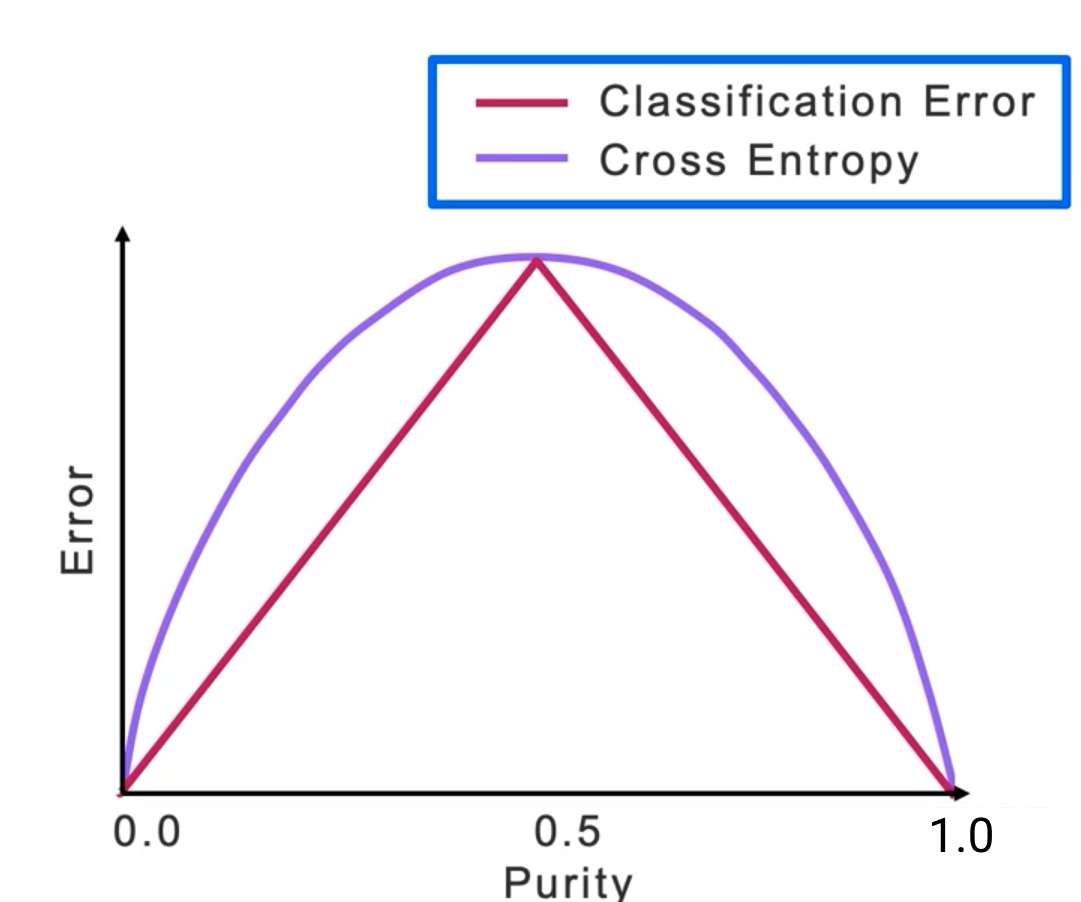
<div/>

### Information Gained by Splitting

#### a. Classification Error: 

Function is flat


- Final average classification error can be identical to partner resulting in premature stopping

<div>
    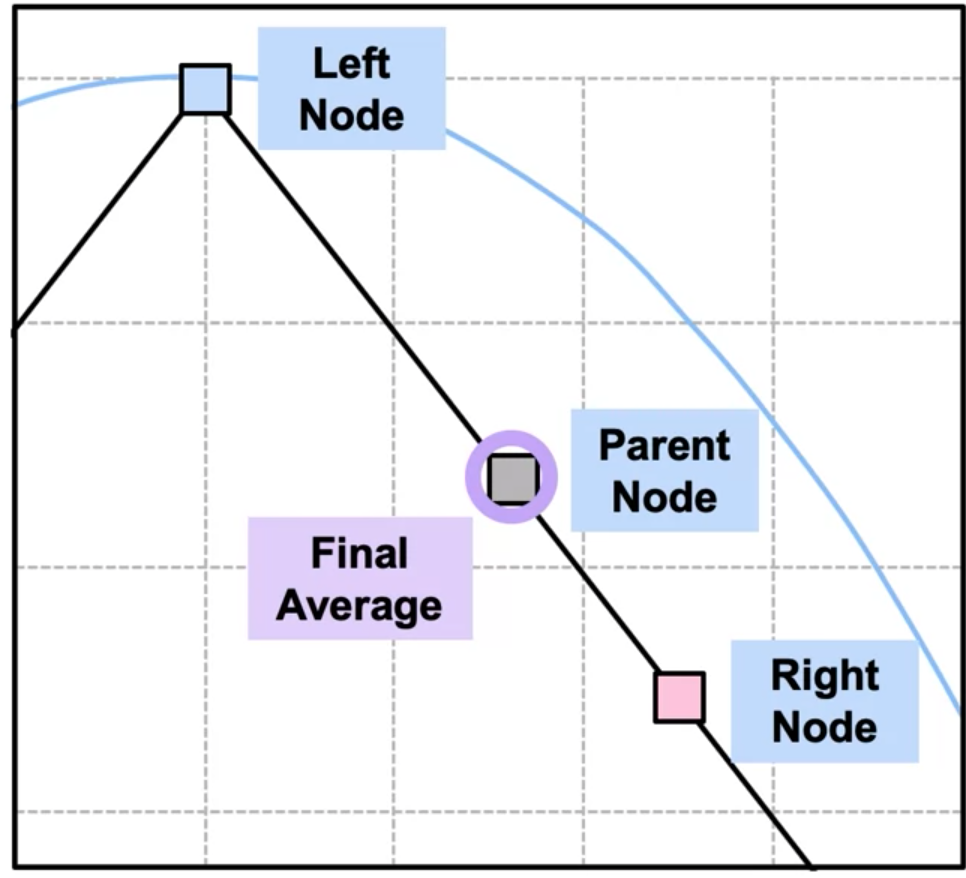
<div/>

#### b. Entropy:

With entropy gain the function has a buldge.


- Allows average information of children to be less that that of the parent


- Relusts in information gain and continued splitting to we can arrive to our homogenous nodes

<div>
    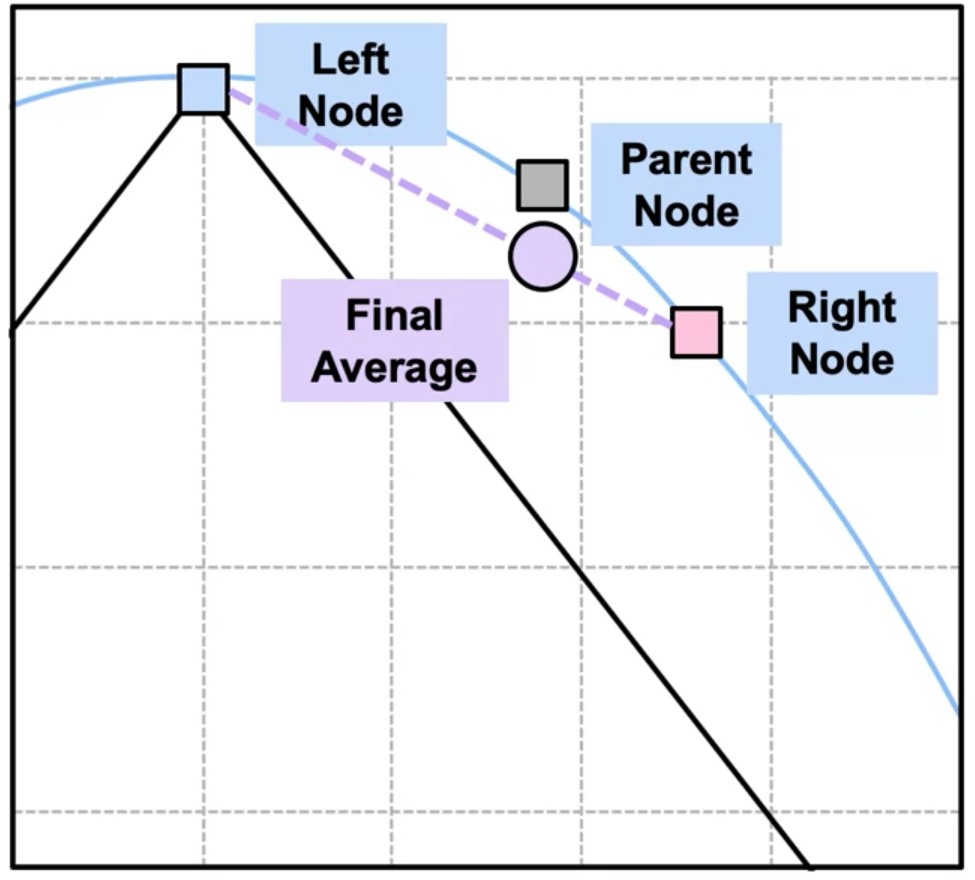
<div/>

## The Gini Index

is often used for splitting (default method on sklearn).

<div>
    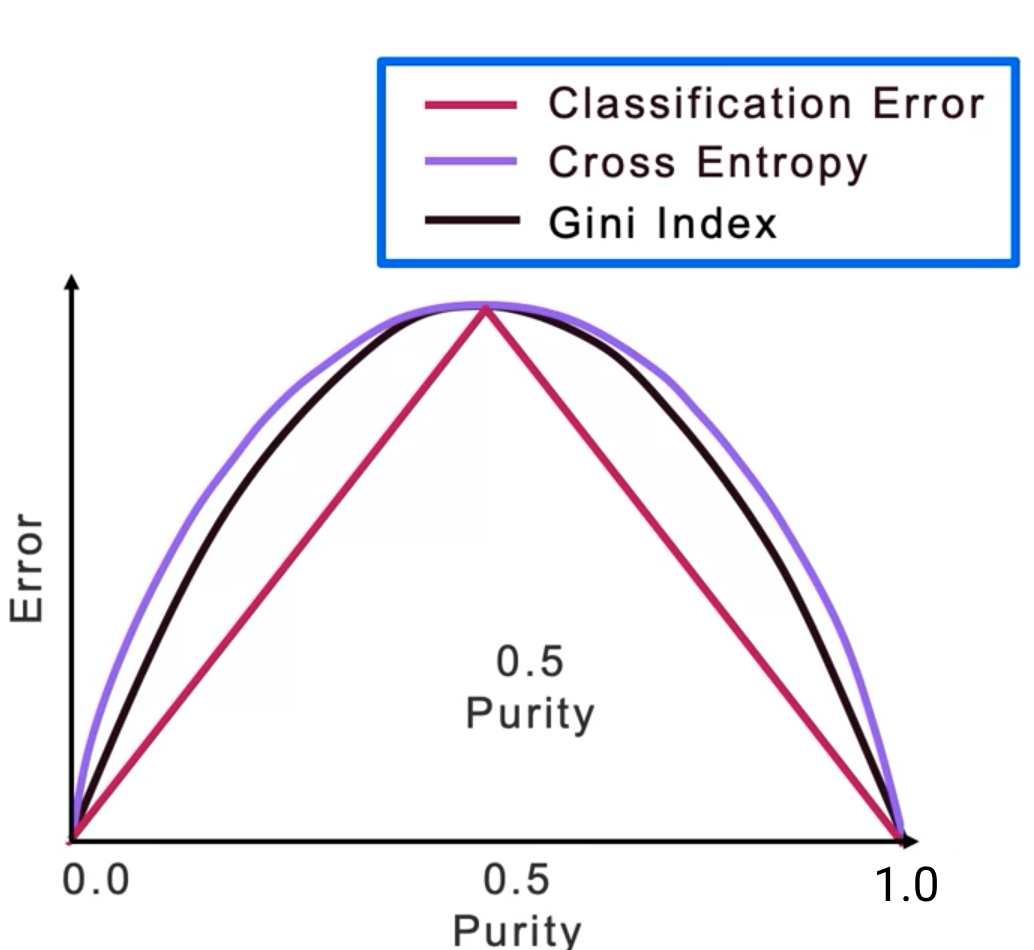
<div/>

- Function is similar to **entropy** as it has that bulge (ensures possibility of perfect splits down the line (all perfect splits however lead to overfitting)


- Does not contain the logarithm

$$ G(t) = 1 - \sum_{i=1}^{n} p(i|t)^2 $$

## Pros and Cons with Decision Trees

Decision trees tend to have **High Variance** meaning they tend to overfit.

- small changes in data greatly affect prediction (high variace)


- Solution: Prune trees (only make a certain amount of steps)/threshold/information gain


- Easy to interpret and visualize


- Handle any data categoyr (binary, ordinal continuous)

- No preprocessing or scaling is required

# Decision Tree Python Syntax

```python
# Import the class containing the classification method
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the class
DTC = DecisionTreeClassifier(criterion="Gini",
                             max_features=10, max_depth=5)

# Fit the instance on the data and then predict the expected value
DTC = DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)

```

# Decision Trees in Practice

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [7]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

## Data Import

* Import the data and examine the features.
* We will be using all of them to predict `color` (white or red), but the colors feature will need to be integer encoded.

In [8]:
filepath = 'Wine_Quality_Data.csv'
data = pd.read_csv(filepath, sep=',')

In [9]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [10]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

### Increase in Information Gain

In order to get the decision tree working in Sklearn, we have to do a binary split so it is going to take something that is a float and then create a binary variable, true or false, out of that float column.

We do not have to transform each of these and come up with each one of those binary variables.

Sklearn is going to instead **search through each one of our floats and see which one of those is going to increase information gain the most**.

Using the Gini Index or Entropy to measure how much we are increasing our information gain, then it will decide, using that binary split, searching through all the different thresholds for that split, which one has the greates increase in information gain.

Convert the color feature to an integer. This is a quick way to do it using Pandas.

In [12]:
data['color'] = data.color.replace('white',0).replace('red',1).astype(int)

## Train-Test Split

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.


* Check the percent composition of each quality level for both the train and test data sets.

In [13]:
# All data columns except for color
feature_cols = [x for x in data.columns if x not in 'color']

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with 1000 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['color']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

Now check the percent composition of each quality level in the train and test data sets. The data set is mostly white wine, as can be seen below.

In [15]:
y_train.value_counts(normalize=True).sort_index()

0    0.753866
1    0.246134
Name: color, dtype: float64

In [16]:
y_test.value_counts(normalize=True).sort_index()

0    0.754
1    0.246
Name: color, dtype: float64

## Fit Decision Tree Classifier - Overfitting Case

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.


* Determine how many nodes are present and what the depth of this (very large) tree is.


* Using this tree, measure the prediction error in the train and test data sets. 

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

The number of nodes and the maximum actual depth.

In [18]:
dt.tree_.node_count, dt.tree_.max_depth

(171, 22)

A function to return error metrics.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

The decision tree predicts a little better on the training data than the test data, which is consistent with (mild)  overfitting. Also notice the perfect recall score for the training data. In many instances, this prediction difference is even greater than that seen here. 

In [20]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy   0.999818  0.984000
precision  0.999261  0.963710
recall     1.000000  0.971545
f1         0.999631  0.967611

Most of these values are already fairly high, but we see how well we are doing on our testing set because we allowed it to **completely overfit** to our training set.

This is expected if we train and test on the same set and that this gap between train and test errors generally indicates overfitting.

## Decision Tree with Cross-Validation

* Using grid search with cross validation, find a decision tree that performs well on the test data set. 


* Determine the number of nodes and the depth of this tree.


* Measure the errors on the training and test sets as before and compare them to those from the tree we did above

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1) # parallize process as much as possible

GR = GR.fit(X_train, y_train)

The number of nodes and the maximum depth of the tree.

In [23]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(99, 7)

These test errors are a little better than the previous ones. So it would seem the previous example overfit the data, but only slightly so.

In [24]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [25]:
train_test_gr_error

train      test
accuracy   0.995816  0.989000
precision  0.998501  0.983539
recall     0.984479  0.971545
f1         0.991440  0.977505

## Regression Tree

* Re-split the data into `X` and `y` parts, this time with `residual_sugar` being the predicted (`y`) data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output, they can be used again to split the data.


* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test data set.


* Measure the errors on the training and test sets using mean squared error.


* Make a plot of actual *vs* predicted residual sugar.

In [26]:
feature_cols = [x for x in data.columns if x != 'residual_sugar']

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'residual_sugar']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'residual_sugar']

In [27]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error', #max neg mse (min mse)
                      n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train, y_train)

The number of nodes and the maximum depth of the tree. This tree has lots of nodes, which is not so surprising given the continuous data.

In [28]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(2891, 13)

The error on train and test data sets. Since this is continuous, we will use mean squared error.

In [29]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr_sugar)},
                                          name='MSE').to_frame().T

train_test_gr_sugar_error

train      test
MSE  0.401886  3.204129

We did better on our training set than testing set, this will often be the case when working with continuous prediction using decision tree regressor, because we are getting that **mean value** once we split on the actual training set. 

A plot of actual vs predicted residual sugar.

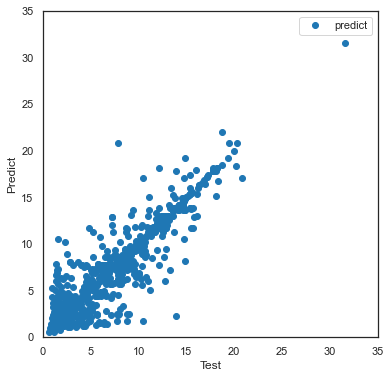

In [30]:
sns.set_context('notebook')
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));

## Visualizing Trees

This question requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from Overfit Decision Tree, where wine color was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from Hyperparameter Tuned Decision Tree, where wine color was predicted but a grid search was used to find the optimal depth and number of features.


In [32]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

First Decision Tree

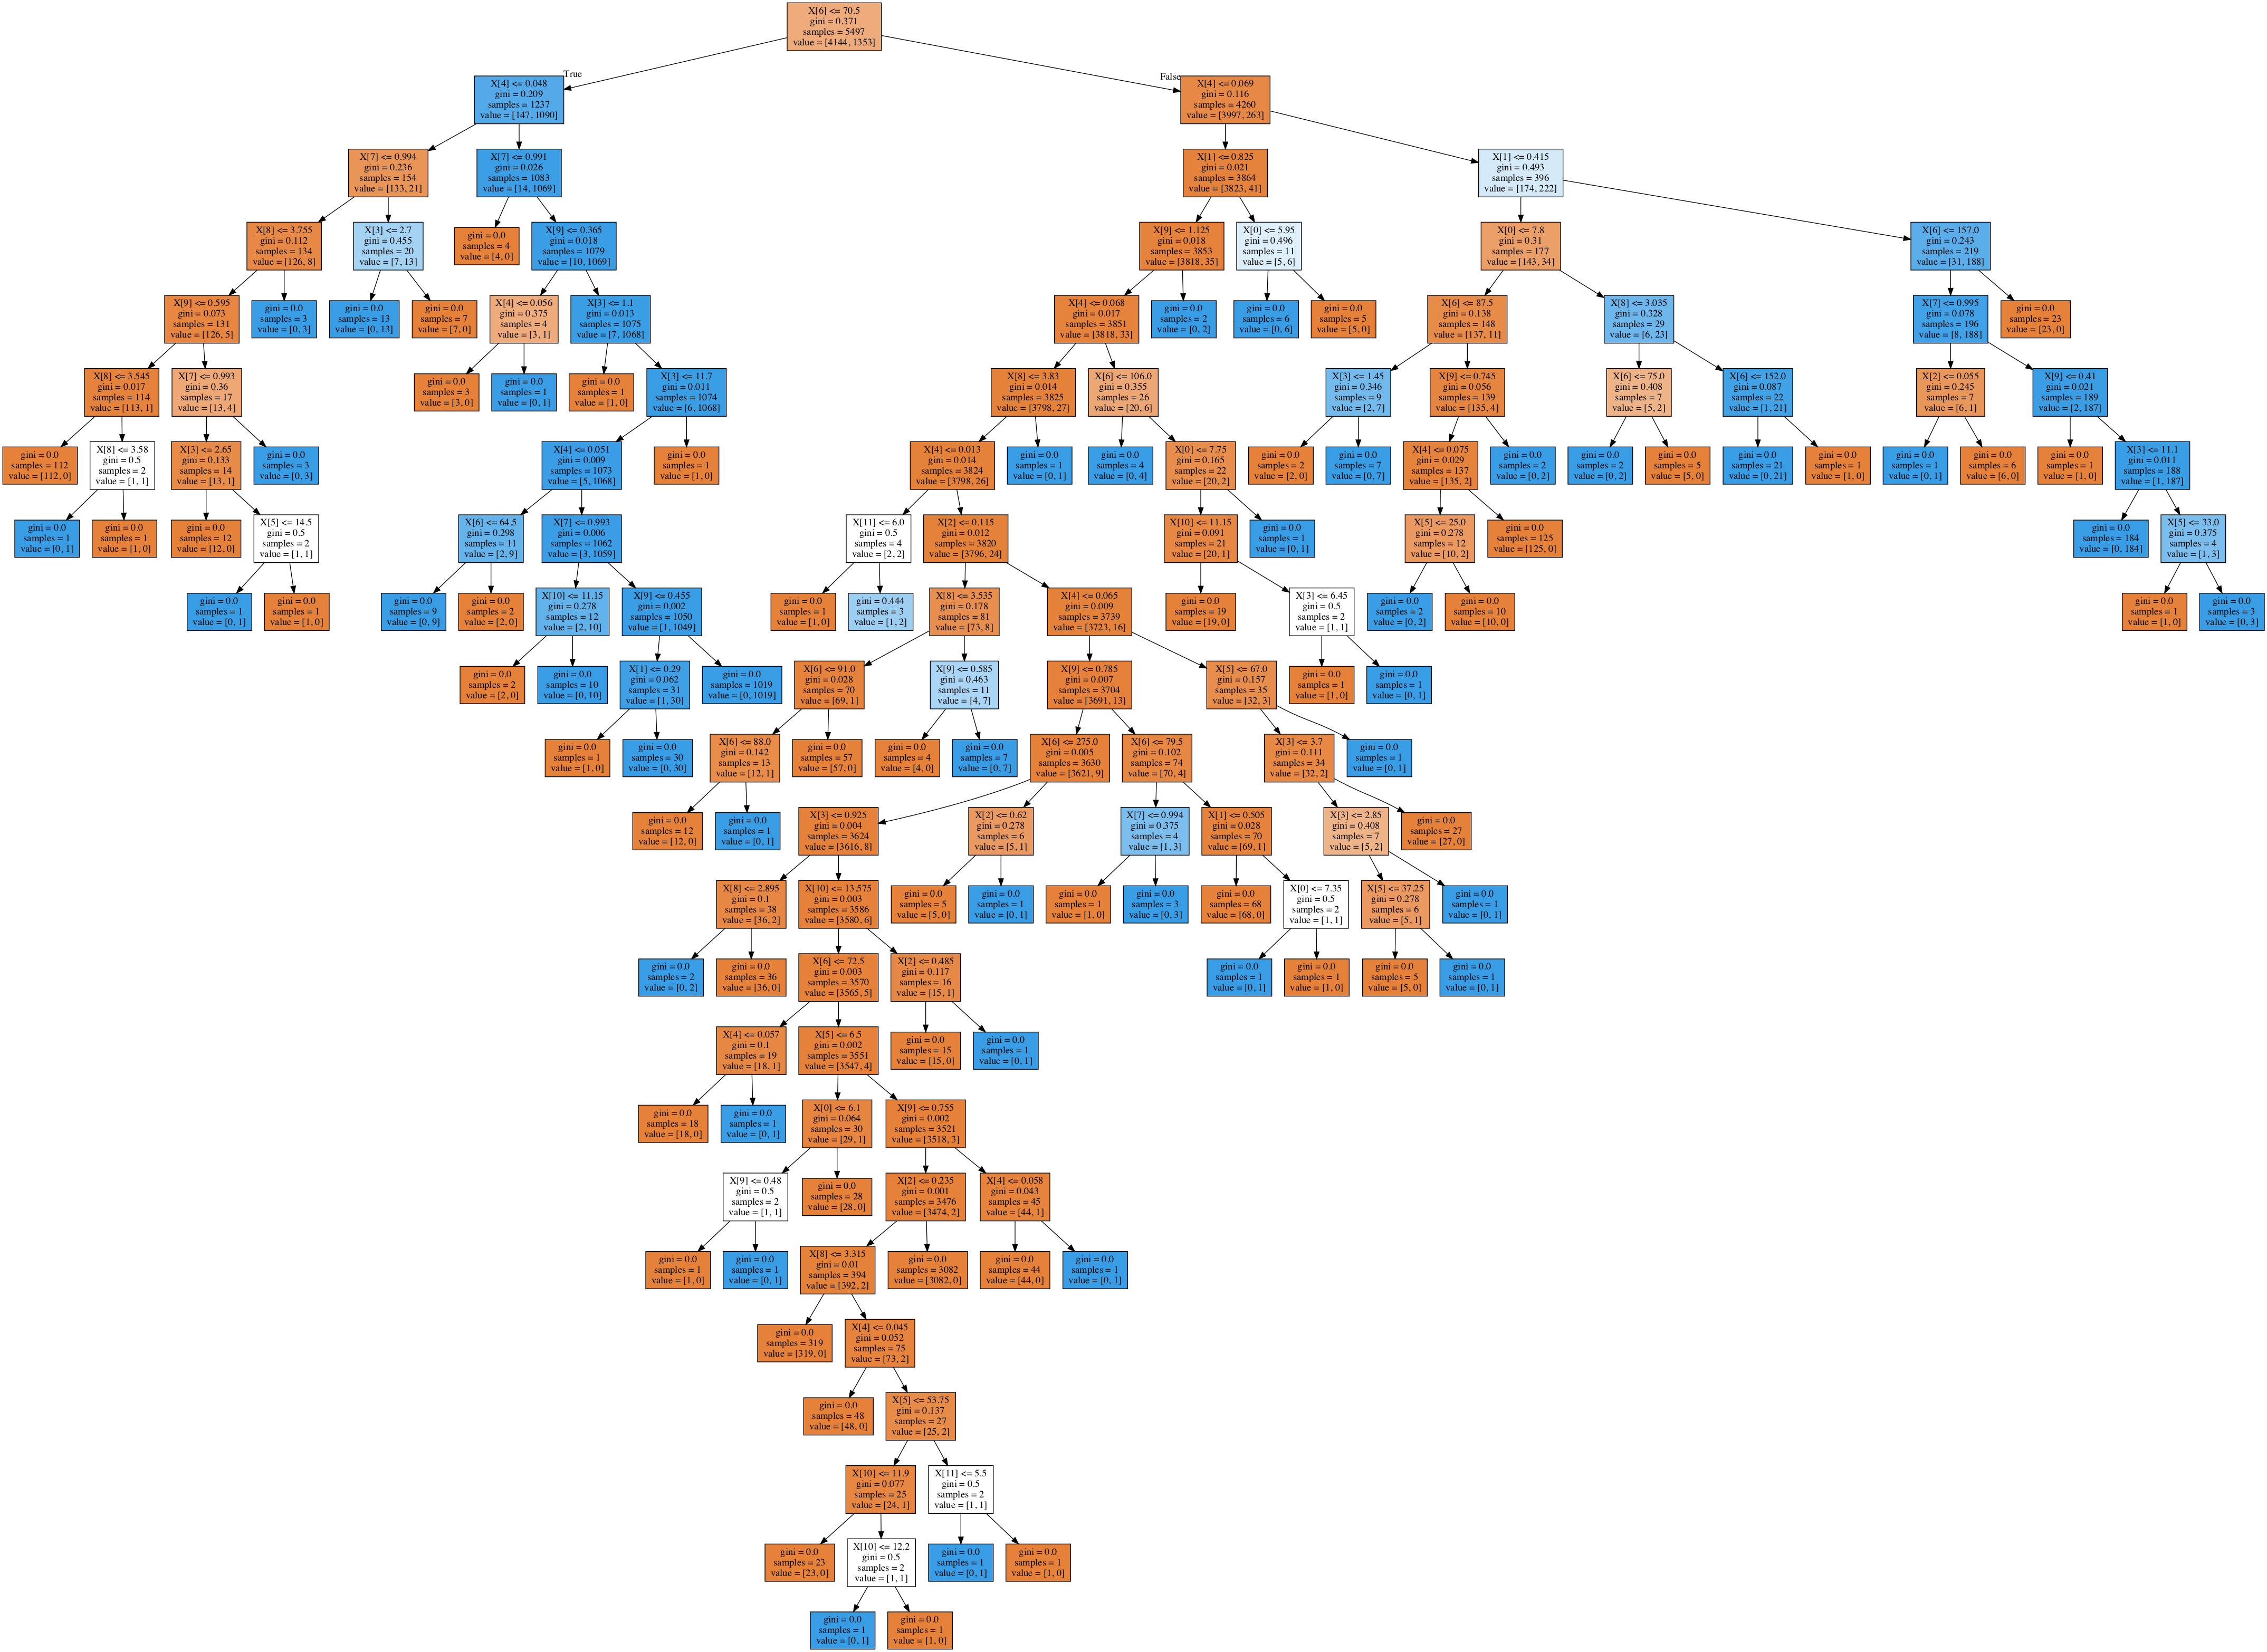

In [39]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename) 

The tree fit with cross validation. This tree is much shallower than the previous one.

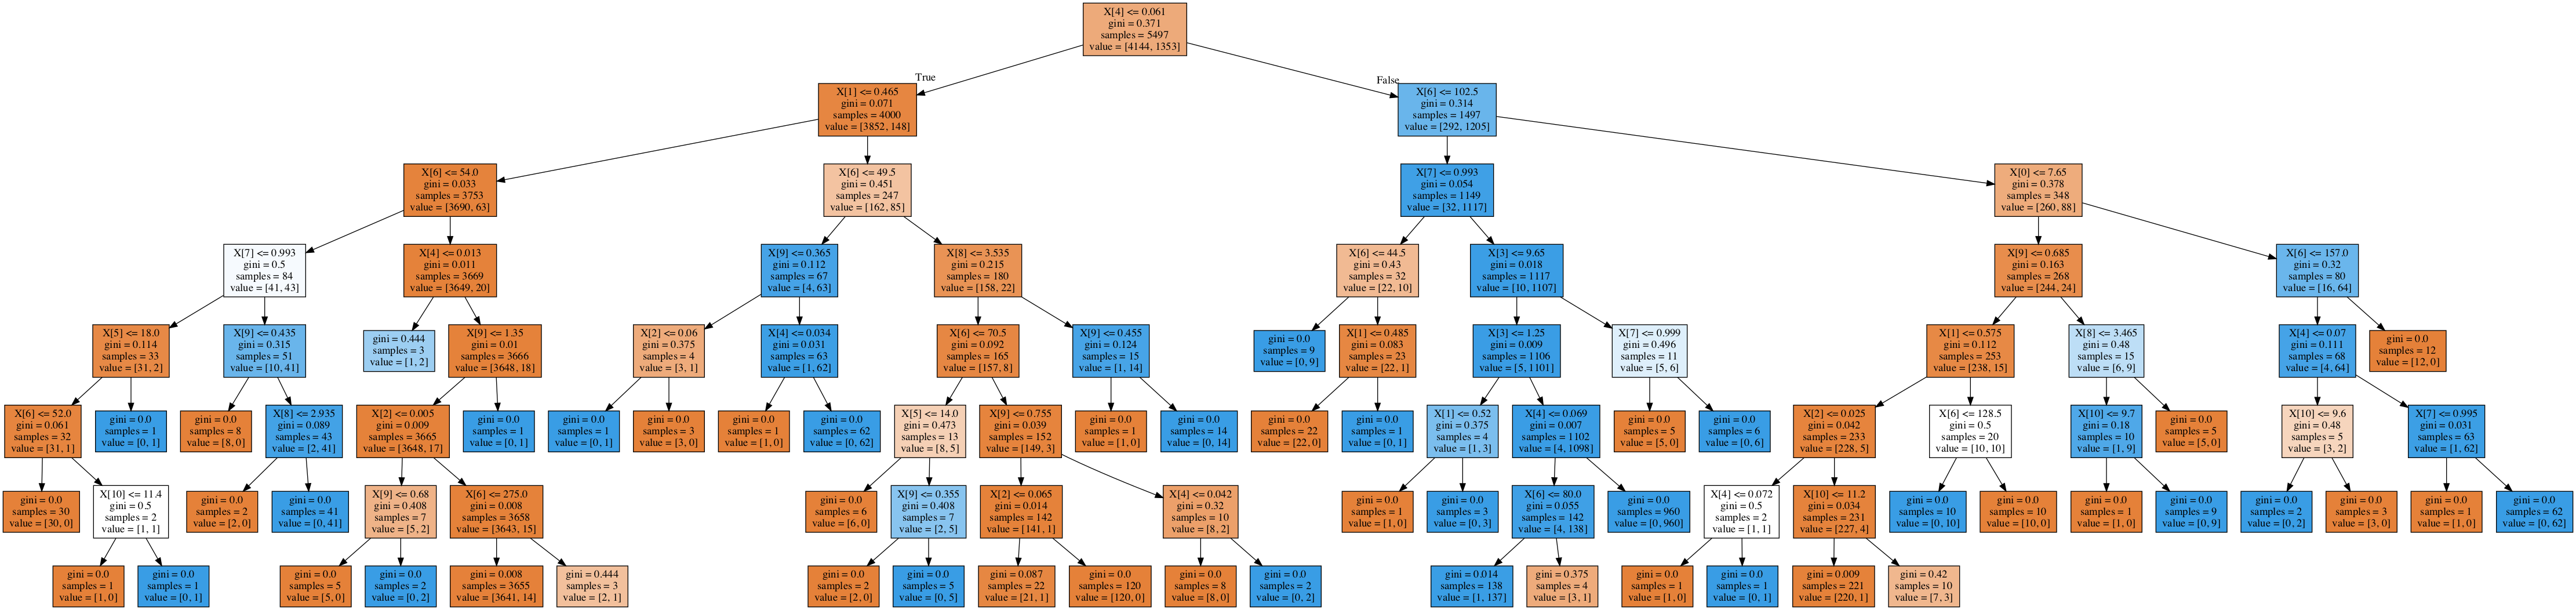

In [40]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree_prune.png'
graph.write_png(filename)
Image(filename=filename) 